In [1]:
import cv2
import os

# Define the path to the image folder
image_folder = "Camera2/front"

In [19]:
import cv2
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

# Define the path to the folder containing the images
folder_path = 'front'

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg')]

# Initialize a list to store the data
data = []

# Function to process each image and detect shape
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Resize the image
    new_width = 800
    new_height = 600
    resized_image = cv2.resize(image, (new_width, new_height))
    
    # Get image dimensions
    height, width = resized_image.shape[:2]
    
    # Define the border size (50 pixels)
    border_size = 50
    
    # Crop the image to remove the 50-pixel border
    cropped_image = resized_image[border_size:height-border_size, border_size:width-border_size]
    
    # Convert the image to grayscale
    blurred = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to create a binary image
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Set a minimum area threshold to filter out small contours
    min_area = 0.7  # Adjust this value according to your needs
    
    # Filter out small contours
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) >= min_area]
    
    shape = "Unknown"
    if filtered_contours:
        all_contours = np.vstack(filtered_contours)
        
        # Get the bounding rectangle for all filtered contours
        x, y, w, h = cv2.boundingRect(all_contours)
        
        # Approximate contour to polygon and get the number of vertices
        epsilon = 0.04 * cv2.arcLength(all_contours, True)
        approx = cv2.approxPolyDP(all_contours, epsilon, True)
        vertices = len(approx)
        
        # Determine the shape based on the number of vertices
        if vertices == 3:
            shape = "Triangle"
        elif vertices == 4:
            aspect_ratio = float(w) / h
            shape = "Square" if 0.95 <= aspect_ratio <= 1.05 else "Rectangle"
        elif vertices > 4:
            shape = "Circle" if cv2.isContourConvex(approx) else "Ellipse"
        
        # Store the image name (without extension), dimensions, and shape in the data list
        image_id = os.path.splitext(os.path.basename(image_path))[0]
        data.append({'ID': image_id, 'Width': w, 'Height': h, 'Shape': shape})
        
        # Draw the bounding rectangle and shape on the image
        cv2.rectangle(cropped_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Prepare the measurement text
        text = f'{shape}: Width: {w}px, Height: {h}px'
        
        # Choose a font and get the text size
        font = cv2.FONT_HERSHEY_SIMPLEX
        text_size = cv2.getTextSize(text, font, 0.5, 2)[0]
        
        # Set the text position
        text_x = x + (w - text_size[0]) // 2
        text_y = y - 10 if y - 10 > 10 else y + 10 + text_size[1]
        
        # Draw the text background rectangle
        cv2.rectangle(cropped_image, (text_x, text_y - text_size[1] - 5), (text_x + text_size[0], text_y + 5), (0, 255, 0), -1)
        
        # Put the text on the image
        cv2.putText(cropped_image, text, (text_x, text_y), font, 0.5, (0, 0, 0), 2)
    else:
        print("No contours found with area greater than the minimum area threshold.")
    
    return cropped_image

# Process each image in the folder
for image_file in tqdm(image_files, desc="Processing images"):
    image_path = os.path.join(folder_path, image_file)
    processed_image = process_image(image_path)

# Convert the data list to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


Processing images:  21%|████████████▋                                               | 232/1092 [01:10<04:26,  3.22it/s]

No contours found with area greater than the minimum area threshold.


Processing images:  23%|█████████████▌                                              | 247/1092 [01:15<04:42,  2.99it/s]

No contours found with area greater than the minimum area threshold.


Processing images:  31%|██████████████████▋                                         | 341/1092 [01:48<04:22,  2.86it/s]

No contours found with area greater than the minimum area threshold.


Processing images:  80%|███████████████████████████████████████████████▉            | 872/1092 [04:44<01:03,  3.45it/s]

No contours found with area greater than the minimum area threshold.


Processing images: 100%|███████████████████████████████████████████████████████████| 1092/1092 [05:59<00:00,  3.04it/s]

        ID  Width  Height      Shape
0        0    206     226  Rectangle
1        1    576     173  Rectangle
2       10    138     164    Unknown
3      100    363     118    Ellipse
4     1000    427     230    Unknown
...    ...    ...     ...        ...
1083   995    420     230  Rectangle
1084   996    420     230    Unknown
1085   997    420     247    Unknown
1086   998    466     230    Unknown
1087   999    535     491    Unknown

[1088 rows x 4 columns]


# Ferets:

In [20]:
pip install feret

Note: you may need to restart the kernel to use updated packages.Collecting feret



In [23]:
pip install pillow 

Note: you may need to restart the kernel to use updated packages.


Processing images:   0%|                                                                      | 0/1092 [00:00<?, ?it/s]

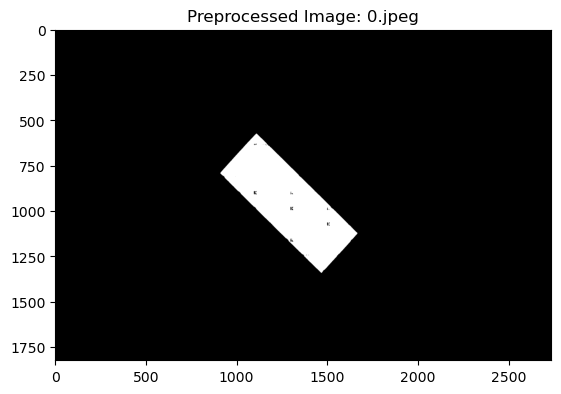

Processing images:   0%|                                                              | 1/1092 [00:01<27:06,  1.49s/it]

Filename: 0.jpeg, Max Feret: 847.2833056304131, Min Feret: 298.4784112164813, Min Feret 90: 795.1720257404896, Max Feret 90: 544.1532919817874


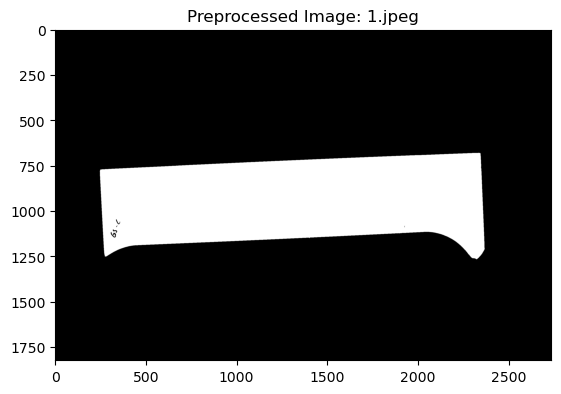

Processing images:   0%|                                                              | 2/1092 [00:03<33:18,  1.83s/it]

Filename: 1.jpeg, Max Feret: 2164.747098392789, Min Feret: 585.4753649269783, Min Feret 90: 2109.167862205965, Max Feret 90: 972.3292857455443


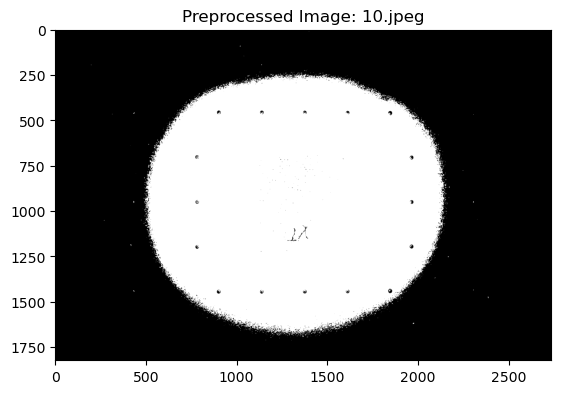

Processing images:   0%|▏                                                             | 3/1092 [00:05<37:18,  2.06s/it]

Filename: 10.jpeg, Max Feret: 2541.3893837820287, Min Feret: 1676.0506627396505, Min Feret 90: 2098.5987385459603, Max Feret 90: 1790.4623467138351


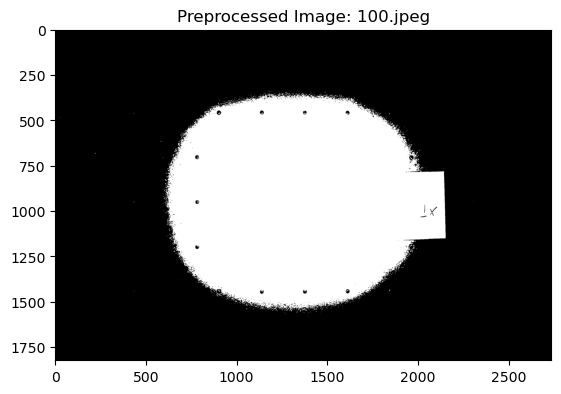

Processing images:   0%|▏                                                             | 4/1092 [00:07<33:05,  1.82s/it]

Filename: 100.jpeg, Max Feret: 2327.3351713923803, Min Feret: 1241.0125348060515, Min Feret 90: 2289.916266318659, Max Feret 90: 1292.839998718309


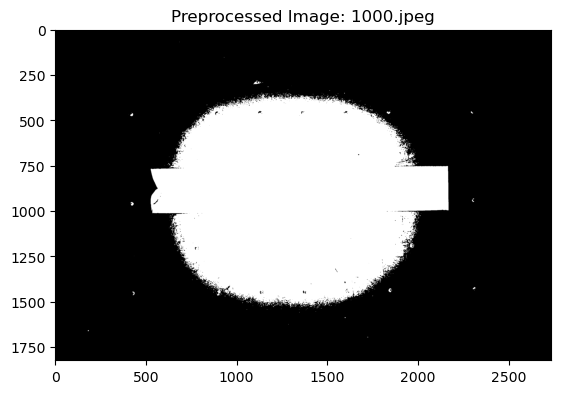

Processing images:   0%|▎                                                             | 5/1092 [00:08<30:36,  1.69s/it]

Filename: 1000.jpeg, Max Feret: 2440.9067987123144, Min Feret: 1603.7738662548752, Min Feret 90: 2133.4282211055965, Max Feret 90: 1992.8466759018247


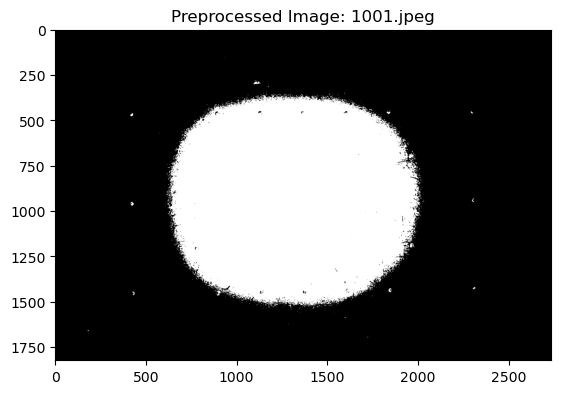

Processing images:   1%|▎                                                             | 6/1092 [00:10<28:50,  1.59s/it]

Filename: 1001.jpeg, Max Feret: 2441.777426384313, Min Feret: 1603.7671338436662, Min Feret 90: 2135.3875960556497, Max Feret 90: 1992.6967738435387


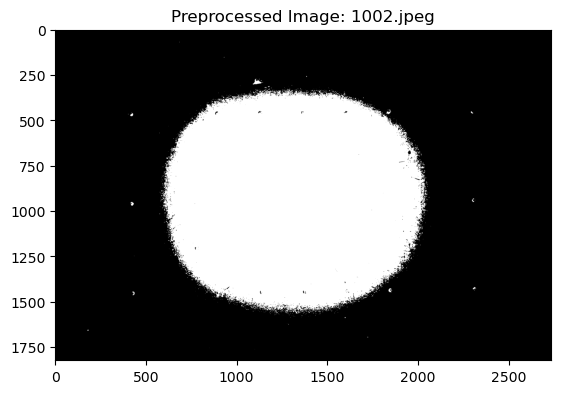

Processing images:   1%|▍                                                             | 7/1092 [00:11<28:09,  1.56s/it]

Filename: 1002.jpeg, Max Feret: 2441.174512401766, Min Feret: 1646.2470624152206, Min Feret 90: 2089.2445803199867, Max Feret 90: 1992.2397908435914


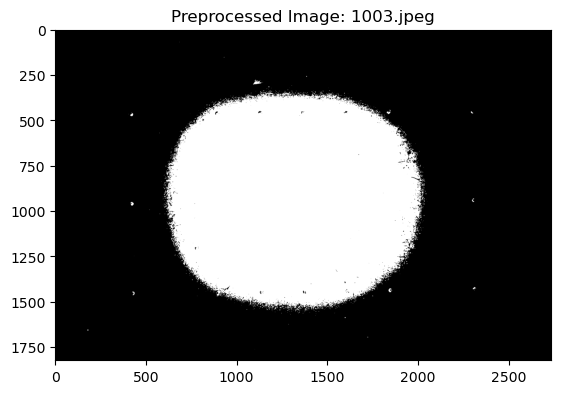

Processing images:   1%|▍                                                             | 8/1092 [00:13<27:38,  1.53s/it]

Filename: 1003.jpeg, Max Feret: 2441.0653411983876, Min Feret: 1636.3480100802906, Min Feret 90: 2104.4383654127573, Max Feret 90: 1991.0650968539549


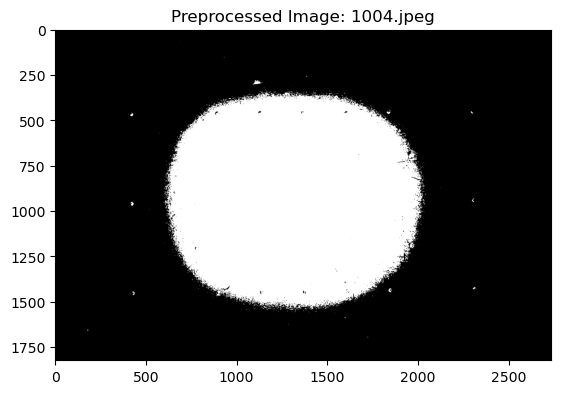

Processing images:   1%|▌                                                             | 9/1092 [00:14<27:11,  1.51s/it]

Filename: 1004.jpeg, Max Feret: 2441.555446841214, Min Feret: 1636.4198903487636, Min Feret 90: 2104.604783838578, Max Feret 90: 1991.3322084453143


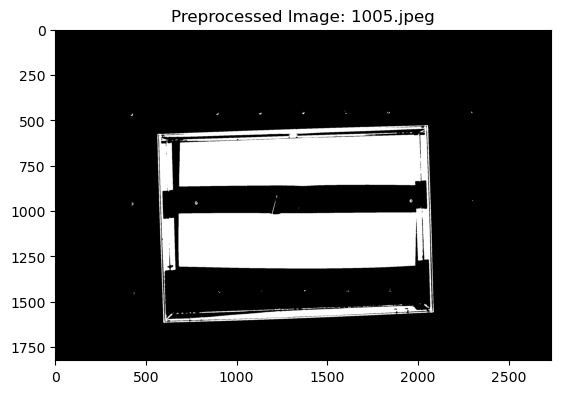

Processing images:   1%|▌                                                            | 10/1092 [00:15<26:20,  1.46s/it]

Filename: 1005.jpeg, Max Feret: 2120.1797093642795, Min Feret: 1154.5277022876546, Min Feret 90: 1889.2964790162807, Max Feret 90: 1748.1282287676086


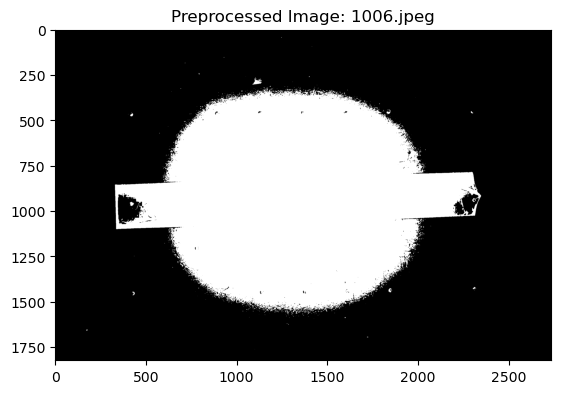

Processing images:   1%|▌                                                            | 11/1092 [00:17<26:13,  1.46s/it]

Filename: 1006.jpeg, Max Feret: 2446.8939494796255, Min Feret: 1724.7298594713334, Min Feret 90: 2110.013805085192, Max Feret 90: 2052.6774366613477


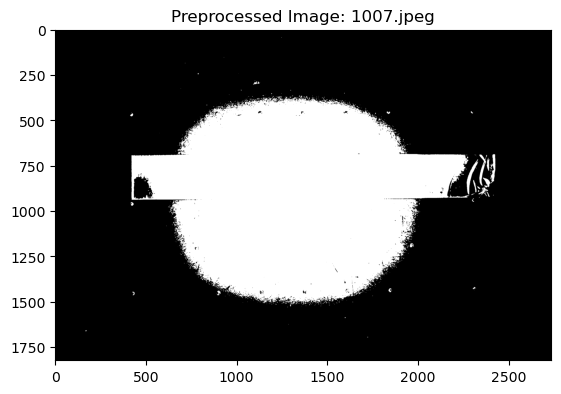

Processing images:   1%|▋                                                            | 12/1092 [00:18<26:03,  1.45s/it]

Filename: 1007.jpeg, Max Feret: 2459.2407364875853, Min Feret: 1641.5998073570029, Min Feret 90: 2241.242294185024, Max Feret 90: 1786.7697679227115


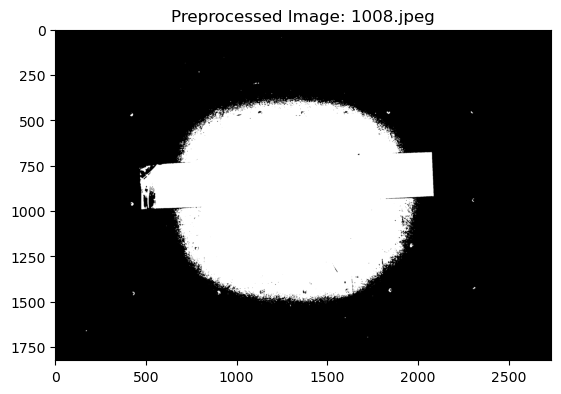

Processing images:   1%|▋                                                            | 13/1092 [00:20<25:49,  1.44s/it]

Filename: 1008.jpeg, Max Feret: 2450.107956805169, Min Feret: 1641.5789642124757, Min Feret 90: 2145.5957150849713, Max Feret 90: 1869.5547627921308


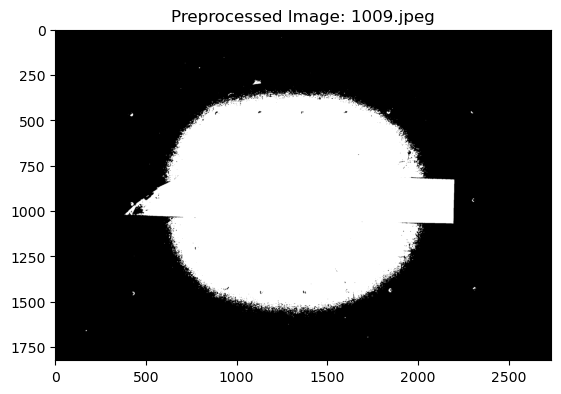

Processing images:   1%|▊                                                            | 14/1092 [00:21<25:57,  1.45s/it]

Filename: 1009.jpeg, Max Feret: 2451.3608465503403, Min Feret: 1641.265997833955, Min Feret 90: 2146.4682361053697, Max Feret 90: 1875.227389092429


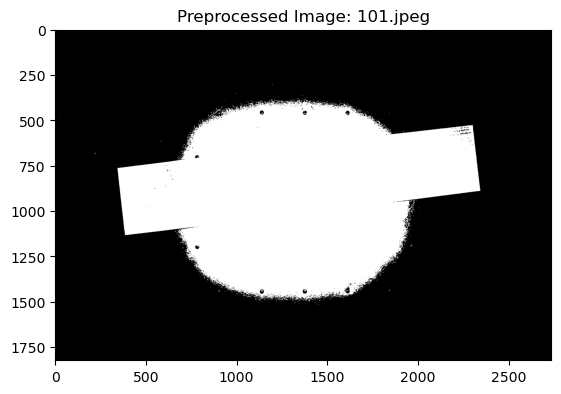

Processing images:   1%|▊                                                            | 15/1092 [00:23<25:58,  1.45s/it]

Filename: 101.jpeg, Max Feret: 2353.585562498207, Min Feret: 1205.3762896099183, Min Feret 90: 2346.7123264412476, Max Feret 90: 1251.6001317042599


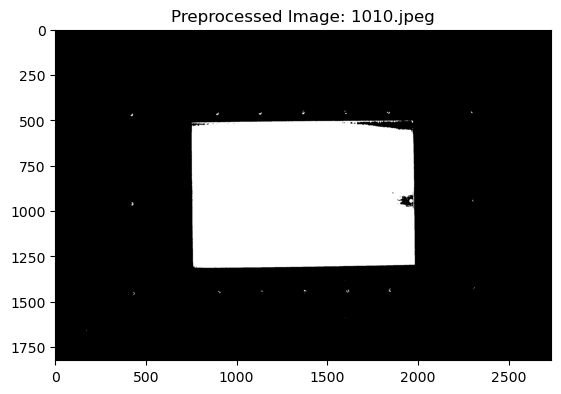

Processing images:   1%|▉                                                            | 16/1092 [00:24<25:38,  1.43s/it]

Filename: 1010.jpeg, Max Feret: 2445.150711101465, Min Feret: 1181.1797493393226, Min Feret 90: 2187.148313145559, Max Feret 90: 1764.253213682986


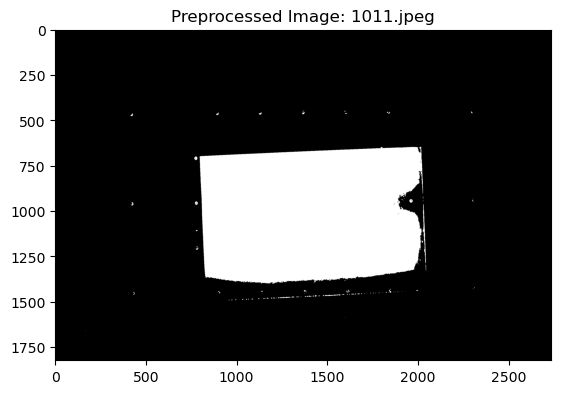

Processing images:   2%|▉                                                            | 17/1092 [00:25<25:23,  1.42s/it]

Filename: 1011.jpeg, Max Feret: 2450.4891348463475, Min Feret: 1182.5341467848023, Min Feret 90: 2193.614484271026, Max Feret 90: 1763.4258967122312


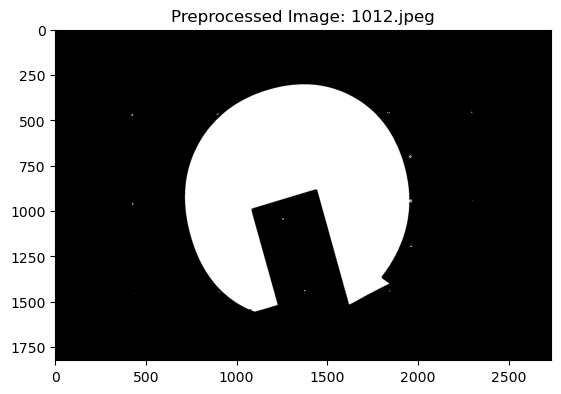

Processing images:   2%|█                                                            | 18/1092 [00:27<25:13,  1.41s/it]

Filename: 1012.jpeg, Max Feret: 2116.119089276405, Min Feret: 1229.7087998301465, Min Feret 90: 1936.0571443129782, Max Feret 90: 1534.3975754740172


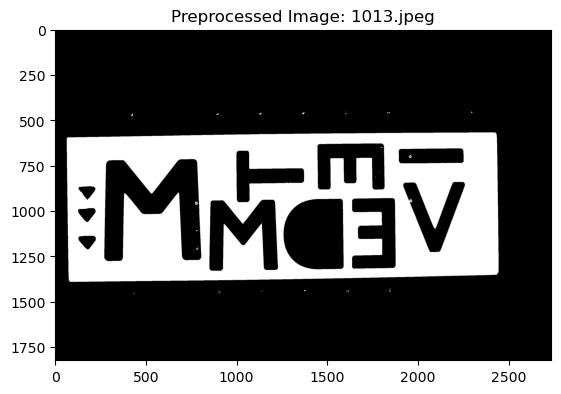

Processing images:   2%|█                                                            | 19/1092 [00:28<25:24,  1.42s/it]

Filename: 1013.jpeg, Max Feret: 2492.8932989600657, Min Feret: 1001.0537041242108, Min Feret 90: 2374.419679144456, Max Feret 90: 1521.0097446135178


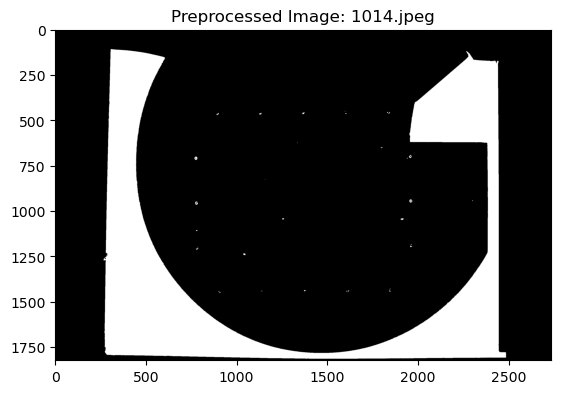

Processing images:   2%|█                                                            | 20/1092 [00:30<25:23,  1.42s/it]

Filename: 1014.jpeg, Max Feret: 2763.259669303629, Min Feret: 1698.9638996337242, Min Feret 90: 2222.9919218354567, Max Feret 90: 2603.1654136264256


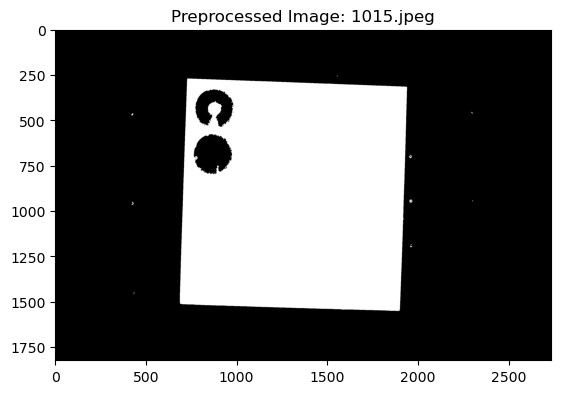

Processing images:   2%|█▏                                                           | 21/1092 [00:31<25:32,  1.43s/it]

Filename: 1015.jpeg, Max Feret: 2121.1461524374035, Min Feret: 1285.6835549283949, Min Feret 90: 1923.3785663100434, Max Feret 90: 1736.6111221365761


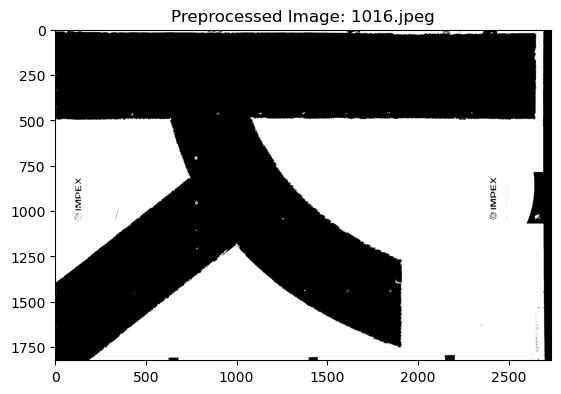

Processing images:   2%|█▏                                                           | 21/1092 [00:33<28:15,  1.58s/it]


KeyboardInterrupt: 

In [33]:
import os
import feret
import numpy as np
from PIL import Image
from tqdm import tqdm
import cv2  # Import OpenCV for image preprocessing
import matplotlib.pyplot as plt  # Import matplotlib for visualization

# Directory containing the images
directory = 'Camera2/front'

# List to store results
results = []

# Get the list of image files in the directory
image_files = [f for f in os.listdir(directory) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Iterate through each file in the directory with tqdm for progress tracking
for filename in tqdm(image_files, desc="Processing images"):
    # Construct the full path to the image
    filepath = os.path.join(directory, filename)
    
    # Load the image and convert to a numpy array
    img = Image.open(filepath)
    img_array = np.array(img.convert('L'))  # Convert to grayscale
    
    # Preprocess the image
    # Step 1: Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(img_array, (5, 5), 0)
    
    # Step 2: Apply Otsu's thresholding
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Check if the colors are correct; invert if necessary
    white_pixels = np.sum(binary == 255)
    black_pixels = np.sum(binary == 0)
    
    if white_pixels > black_pixels:
        binary = cv2.bitwise_not(binary)

    # Show the preprocessed image
    plt.figure()
    plt.title(f'Preprocessed Image: {filename}')
    plt.imshow(binary, cmap='gray')
    plt.show()

    # Calculate Feret diameters on the preprocessed image
    try:
        maxf, minf, minf90, maxf90 = feret.all(binary)
        
        # Store the results in a dictionary
        result = {
            'filename': filename,
            'maxf': maxf,
            'minf': minf,
            'minf90': minf90,
            'maxf90': maxf90
        }
        
        # Append the dictionary to the results list
        results.append(result)
        
        # Print the results for the current image
        print(f"Filename: {filename}, Max Feret: {maxf}, Min Feret: {minf}, Min Feret 90: {minf90}, Max Feret 90: {maxf90}")
    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Optionally, print all results at the end
# for res in results:
#     print(f"Filename: {res['filename']}, Max Feret: {res['maxf']}, Min Feret: {res['minf']}, Min Feret 90: {res['minf90']}, Max Feret 90: {res['maxf90']}")


Processing images:   0%|                                                                      | 0/1092 [00:00<?, ?it/s]

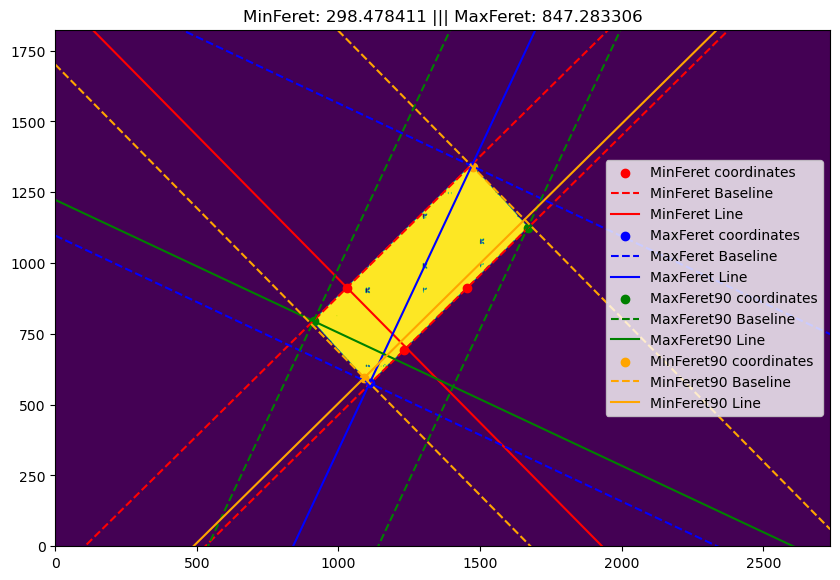

Processing images:   0%|                                                              | 1/1092 [00:02<37:55,  2.09s/it]

Filename: 0.jpeg, Max Feret Length: 847.2833056304131, Min Feret Length: 298.4784112164813


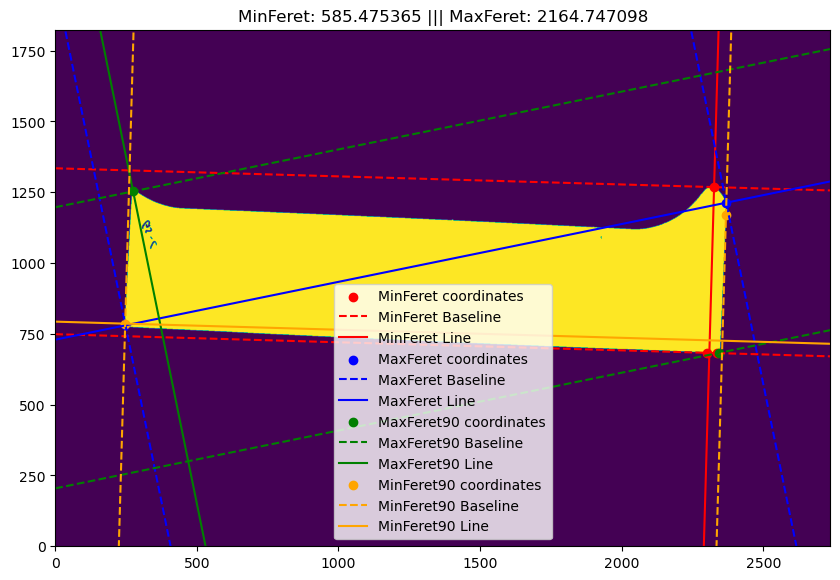

Processing images:   0%|                                                              | 2/1092 [00:04<39:41,  2.18s/it]

Filename: 1.jpeg, Max Feret Length: 2164.747098392789, Min Feret Length: 585.4753649269783


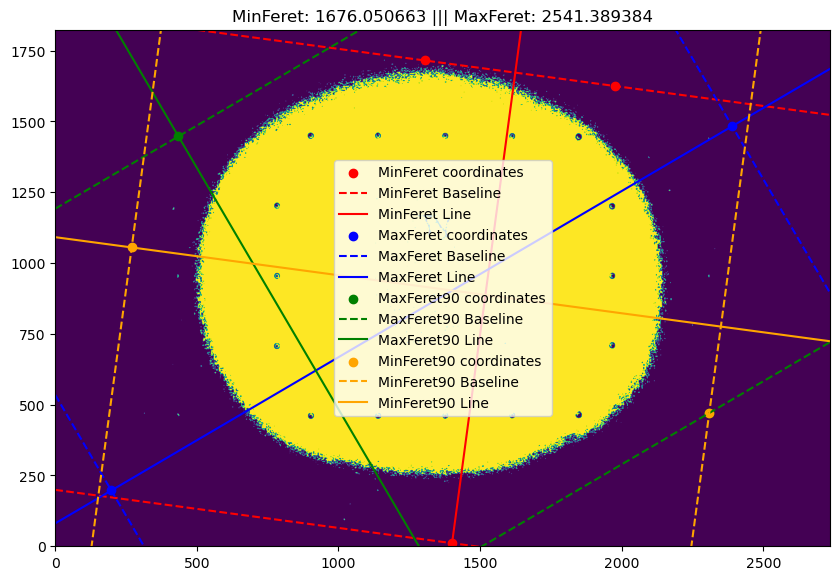

Processing images:   0%|▏                                                             | 3/1092 [00:06<42:16,  2.33s/it]

Filename: 10.jpeg, Max Feret Length: 2541.3893837820287, Min Feret Length: 1676.0506627396505


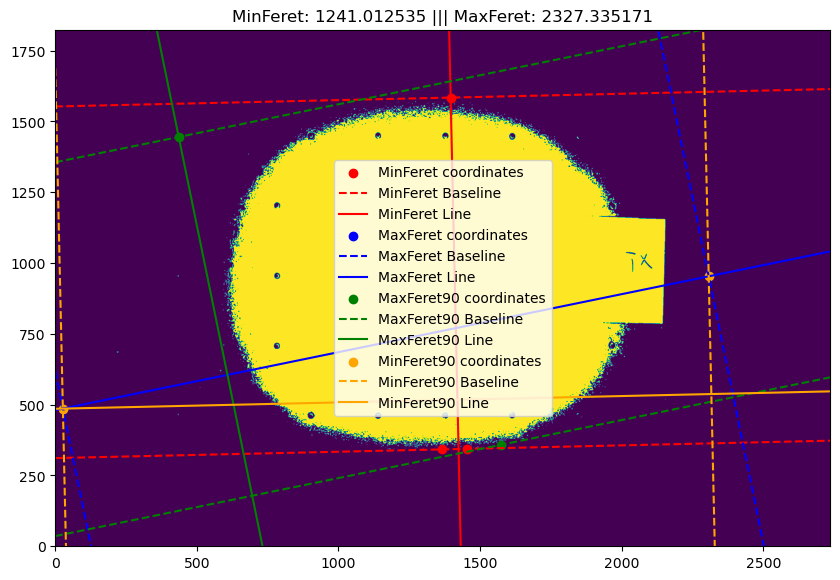

Processing images:   0%|▏                                                             | 4/1092 [00:09<43:06,  2.38s/it]

Filename: 100.jpeg, Max Feret Length: 2327.3351713923803, Min Feret Length: 1241.0125348060515


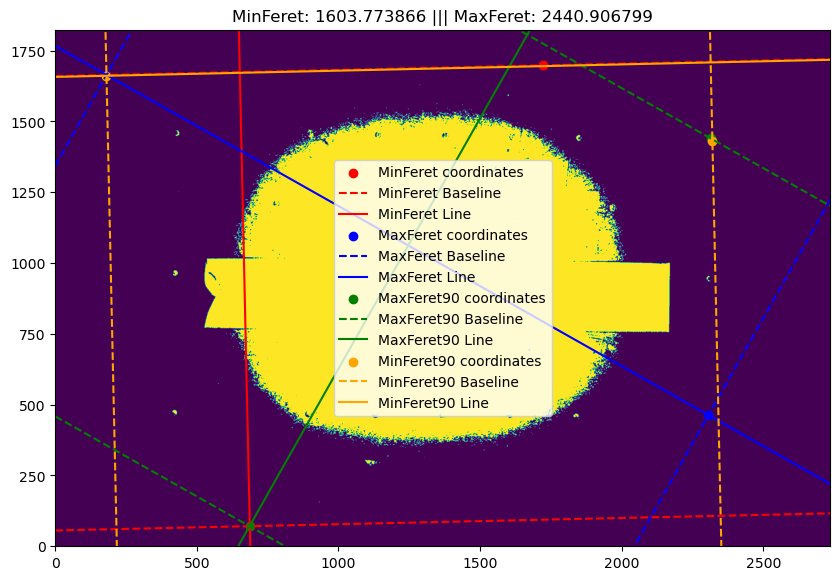

Processing images:   0%|▎                                                             | 5/1092 [00:11<42:59,  2.37s/it]

Filename: 1000.jpeg, Max Feret Length: 2440.9067987123144, Min Feret Length: 1603.7738662548752


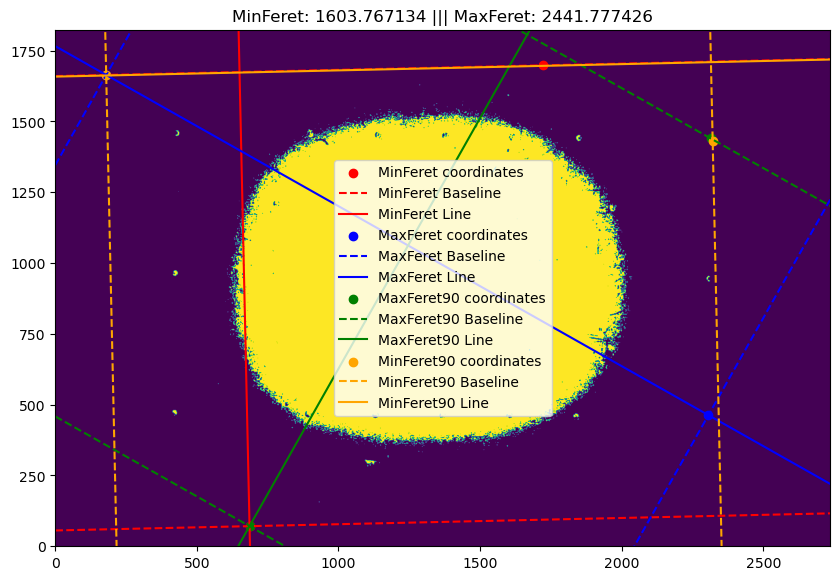

Processing images:   1%|▎                                                             | 6/1092 [00:14<42:46,  2.36s/it]

Filename: 1001.jpeg, Max Feret Length: 2441.777426384313, Min Feret Length: 1603.7671338436662


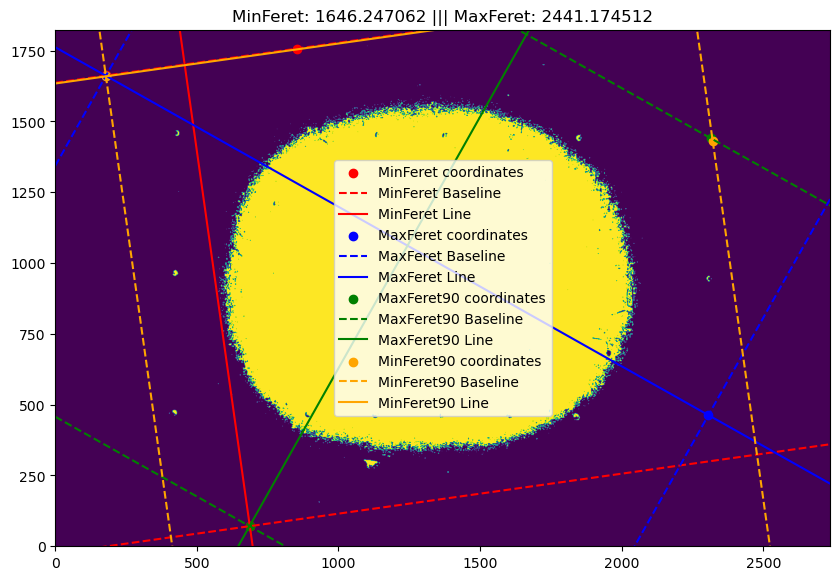

Processing images:   1%|▍                                                             | 7/1092 [00:16<43:11,  2.39s/it]

Filename: 1002.jpeg, Max Feret Length: 2441.174512401766, Min Feret Length: 1646.2470624152206


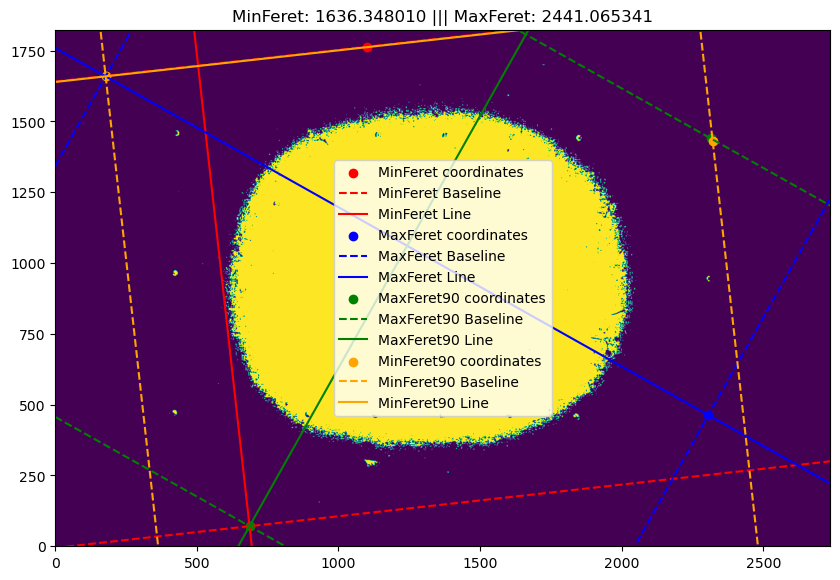

Processing images:   1%|▍                                                             | 8/1092 [00:18<42:46,  2.37s/it]

Filename: 1003.jpeg, Max Feret Length: 2441.0653411983876, Min Feret Length: 1636.3480100802906


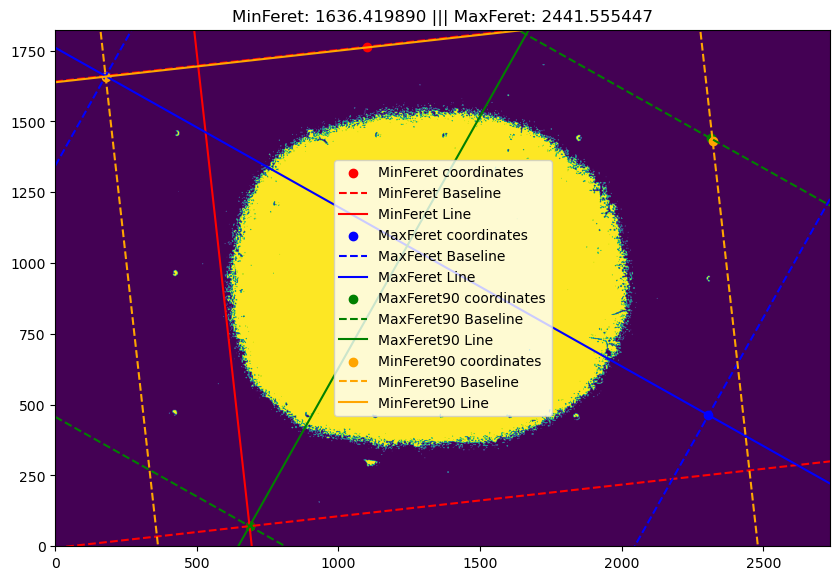

Processing images:   1%|▌                                                             | 9/1092 [00:21<42:33,  2.36s/it]

Filename: 1004.jpeg, Max Feret Length: 2441.555446841214, Min Feret Length: 1636.4198903487636


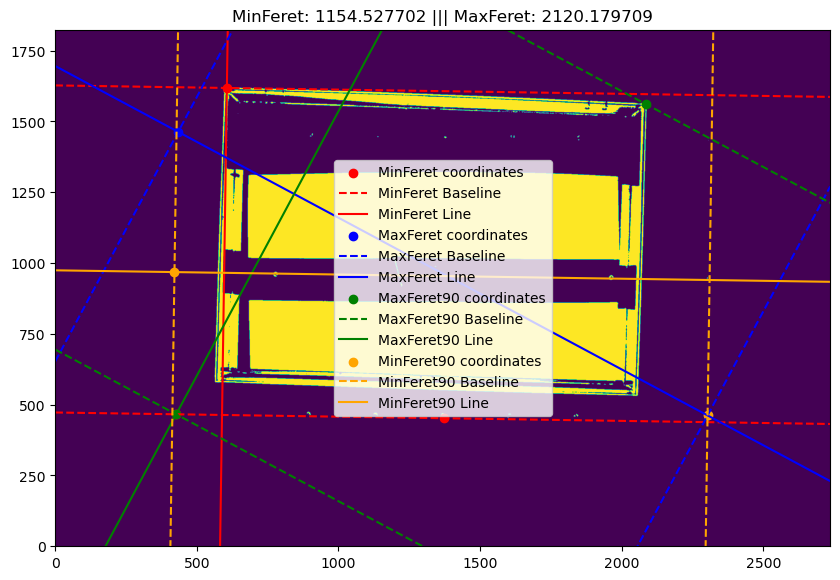

Processing images:   1%|▌                                                            | 10/1092 [00:23<41:56,  2.33s/it]

Filename: 1005.jpeg, Max Feret Length: 2120.1797093642795, Min Feret Length: 1154.5277022876546


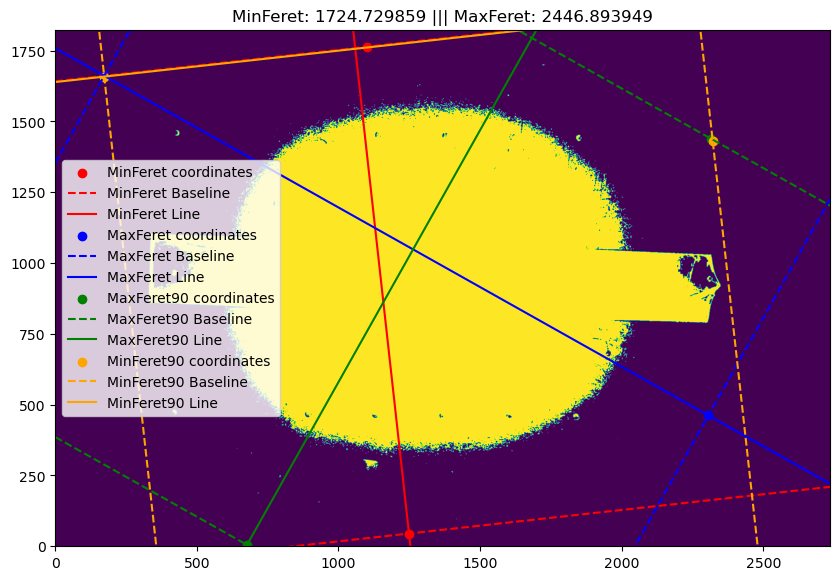

Processing images:   1%|▌                                                            | 11/1092 [00:25<42:41,  2.37s/it]

Filename: 1006.jpeg, Max Feret Length: 2446.8939494796255, Min Feret Length: 1724.7298594713334


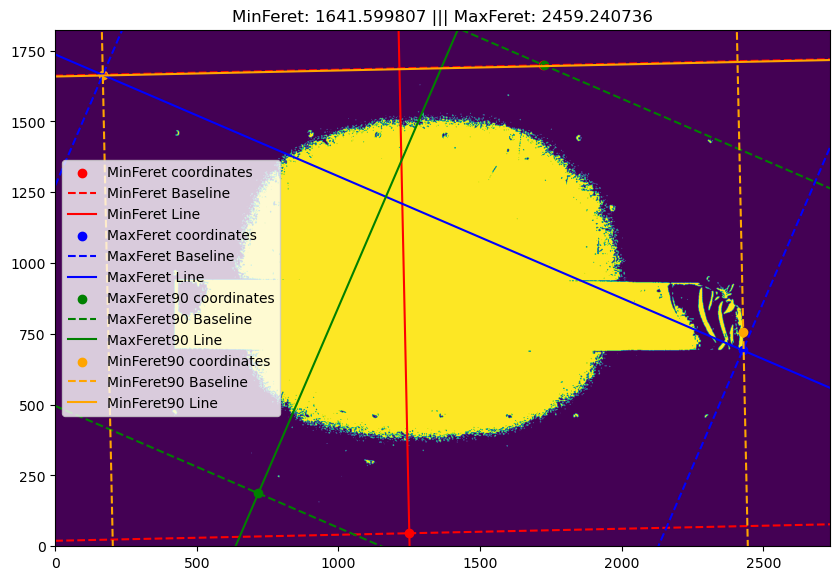

Processing images:   1%|▋                                                            | 12/1092 [00:28<42:59,  2.39s/it]

Filename: 1007.jpeg, Max Feret Length: 2459.2407364875853, Min Feret Length: 1641.5998073570029


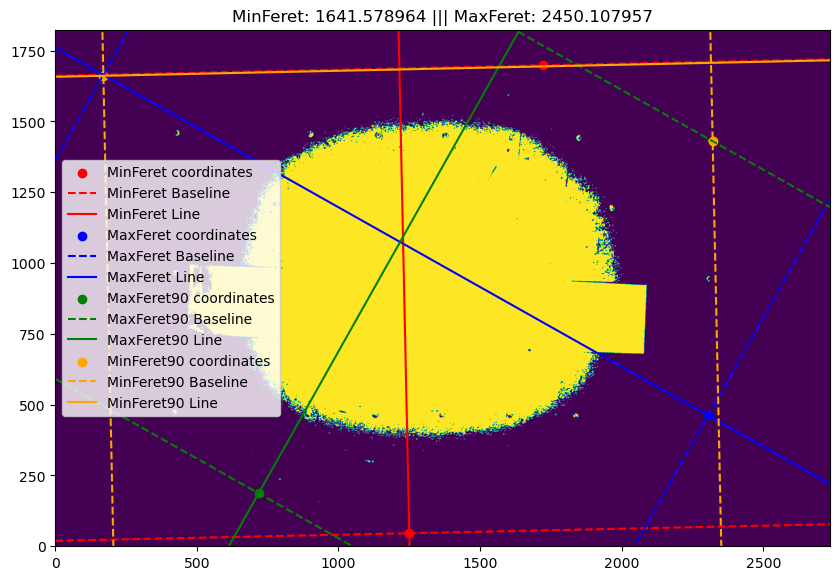

Processing images:   1%|▋                                                            | 13/1092 [00:30<42:43,  2.38s/it]

Filename: 1008.jpeg, Max Feret Length: 2450.107956805169, Min Feret Length: 1641.5789642124757


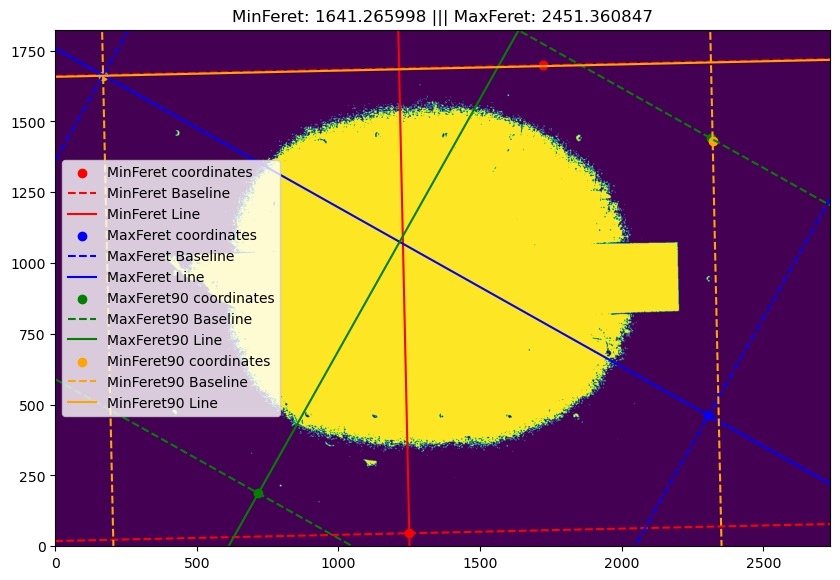

Processing images:   1%|▊                                                            | 14/1092 [00:33<42:48,  2.38s/it]

Filename: 1009.jpeg, Max Feret Length: 2451.3608465503403, Min Feret Length: 1641.265997833955


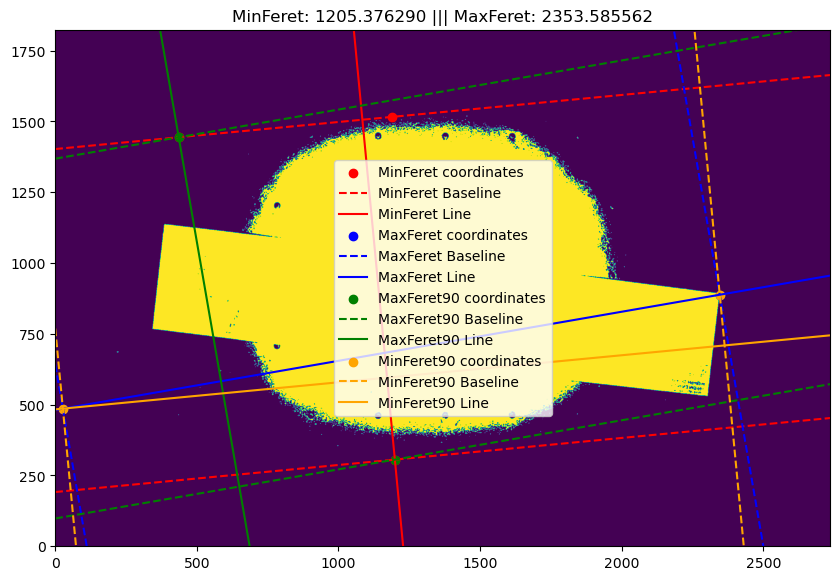

Processing images:   1%|▊                                                            | 15/1092 [00:35<43:01,  2.40s/it]

Filename: 101.jpeg, Max Feret Length: 2353.585562498207, Min Feret Length: 1205.3762896099183


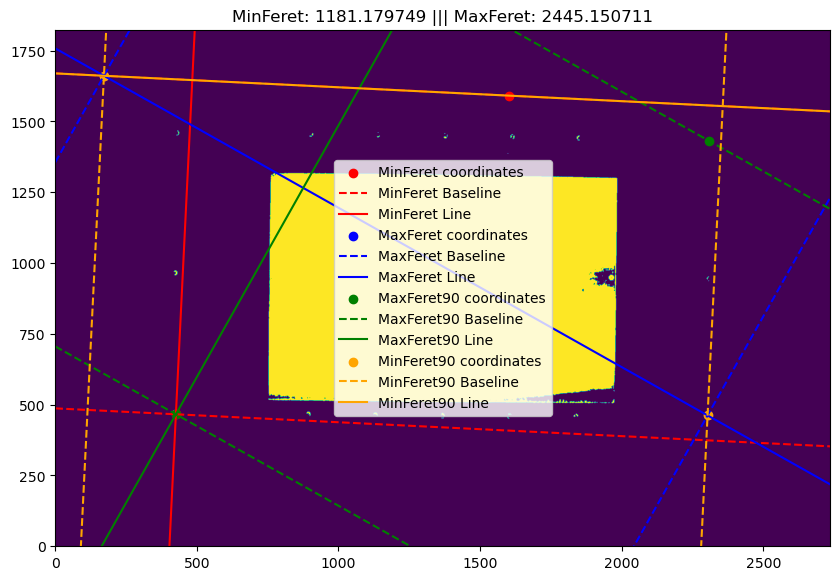

Processing images:   1%|▉                                                            | 16/1092 [00:37<42:00,  2.34s/it]

Filename: 1010.jpeg, Max Feret Length: 2445.150711101465, Min Feret Length: 1181.1797493393226


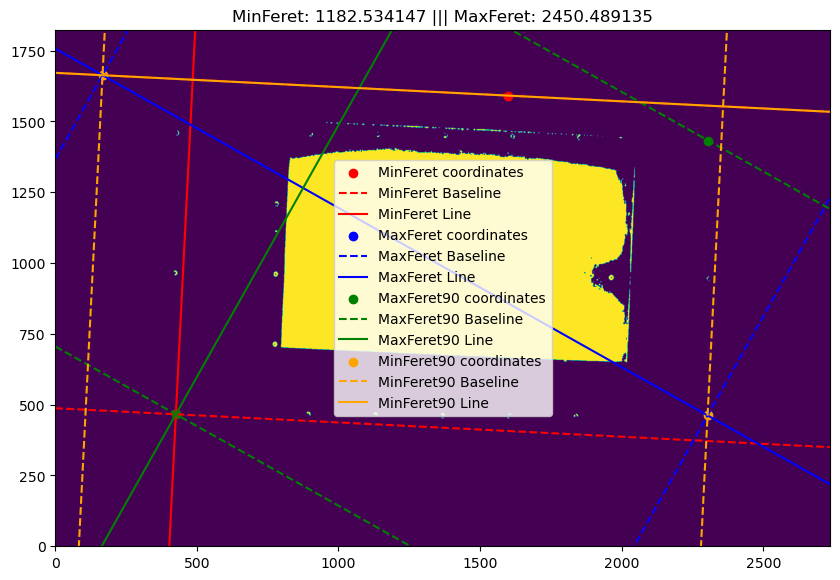

Processing images:   2%|▉                                                            | 17/1092 [00:40<44:10,  2.47s/it]

Filename: 1011.jpeg, Max Feret Length: 2450.4891348463475, Min Feret Length: 1182.5341467848023


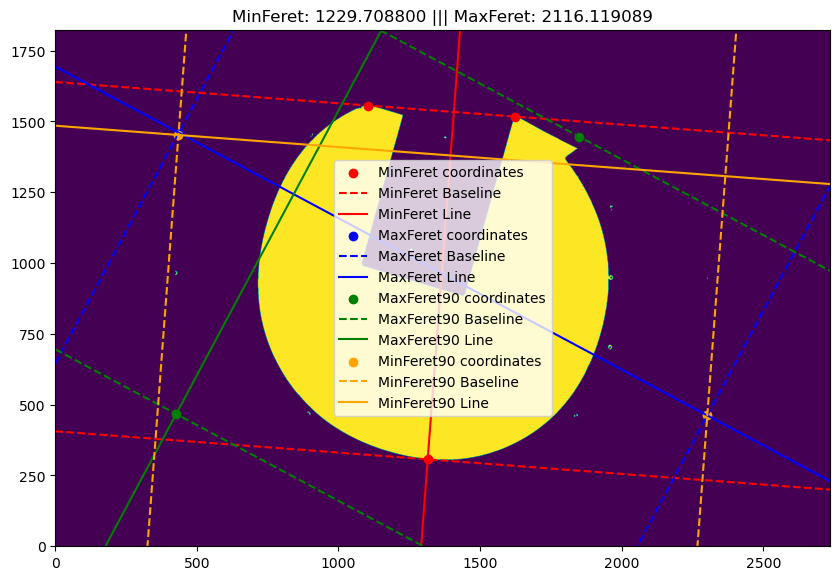

Processing images:   2%|█                                                            | 18/1092 [00:42<42:46,  2.39s/it]

Filename: 1012.jpeg, Max Feret Length: 2116.119089276405, Min Feret Length: 1229.7087998301465


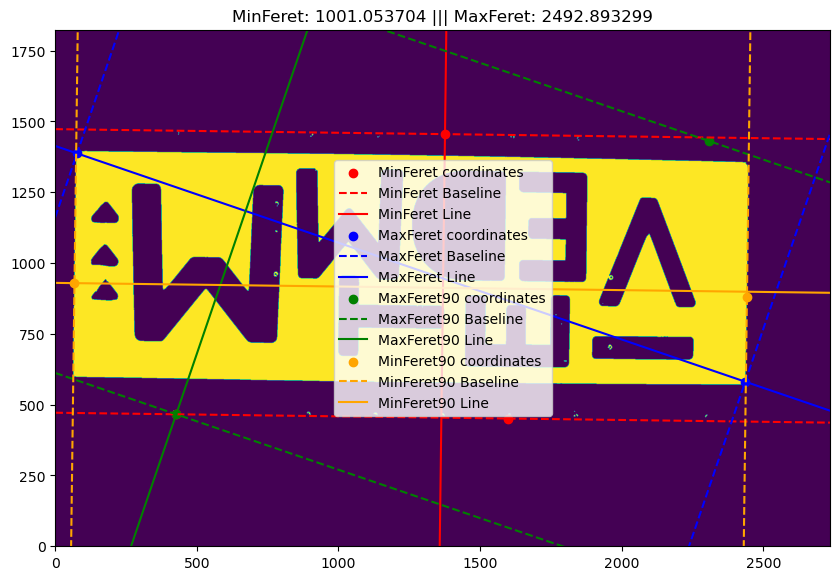

Processing images:   2%|█                                                            | 19/1092 [00:44<42:22,  2.37s/it]

Filename: 1013.jpeg, Max Feret Length: 2492.8932989600657, Min Feret Length: 1001.0537041242108


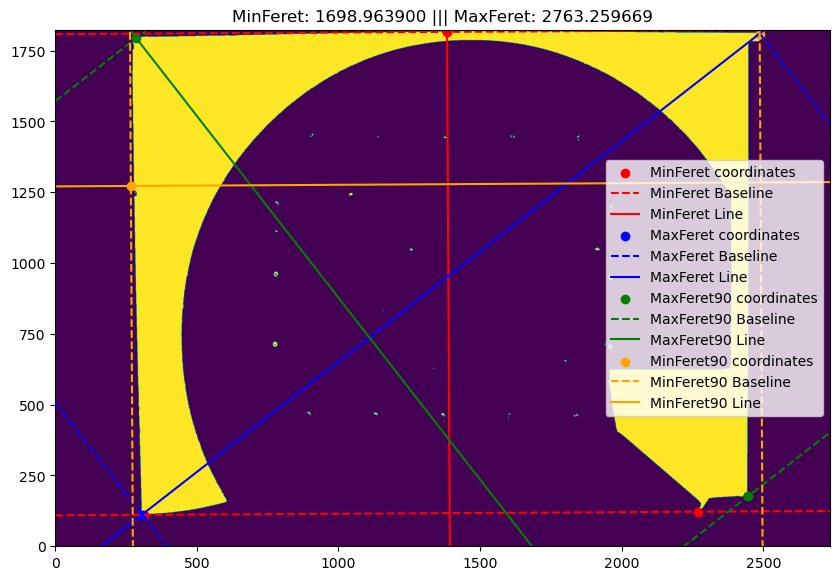

Processing images:   2%|█                                                            | 20/1092 [00:47<41:31,  2.32s/it]

Filename: 1014.jpeg, Max Feret Length: 2763.259669303629, Min Feret Length: 1698.9638996337242


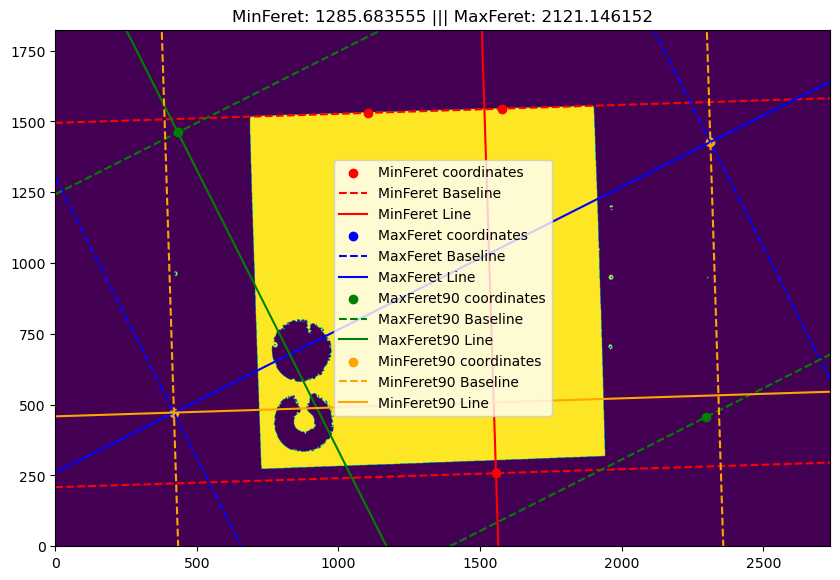

Processing images:   2%|█▏                                                           | 21/1092 [00:49<41:35,  2.33s/it]

Filename: 1015.jpeg, Max Feret Length: 2121.1461524374035, Min Feret Length: 1285.6835549283949


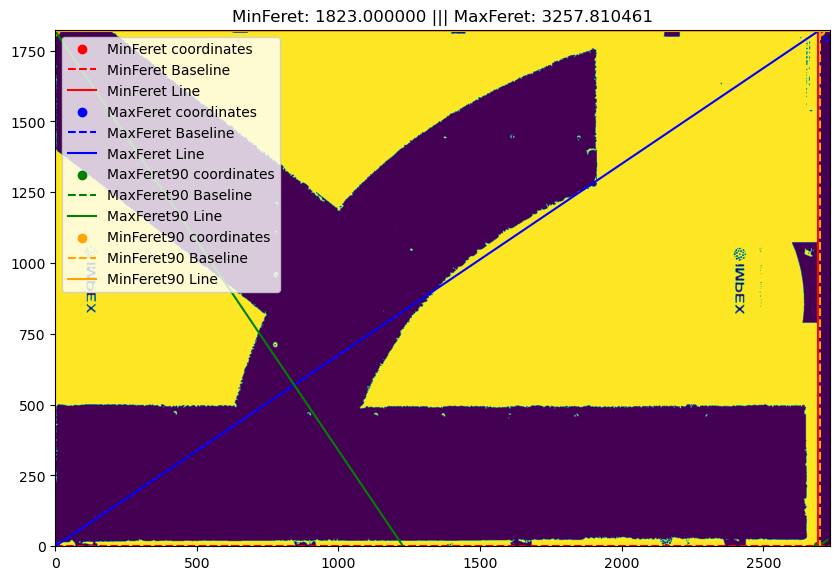

Processing images:   2%|█▏                                                           | 22/1092 [00:52<43:24,  2.43s/it]

Filename: 1016.jpeg, Max Feret Length: 3257.8104610305368, Min Feret Length: 1823.0


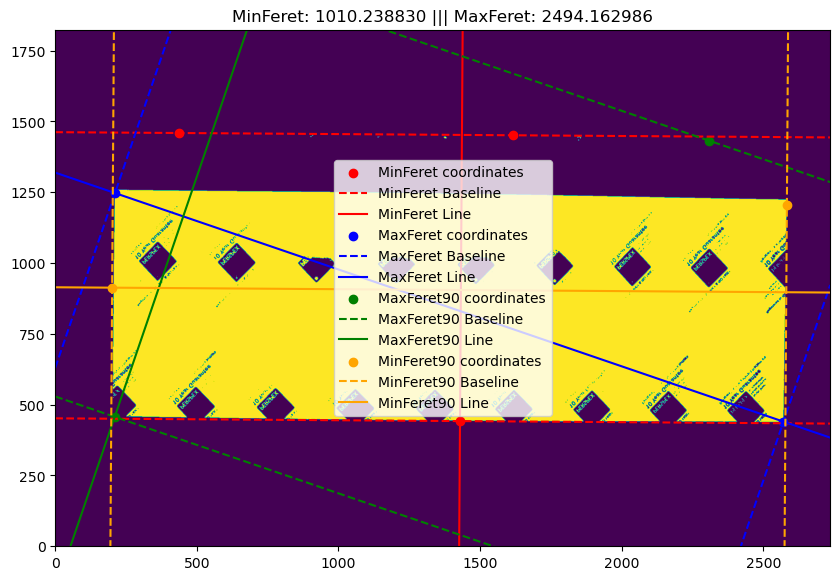

Processing images:   2%|█▎                                                           | 23/1092 [00:54<43:24,  2.44s/it]

Filename: 1017.jpeg, Max Feret Length: 2494.16298585317, Min Feret Length: 1010.2388301708596


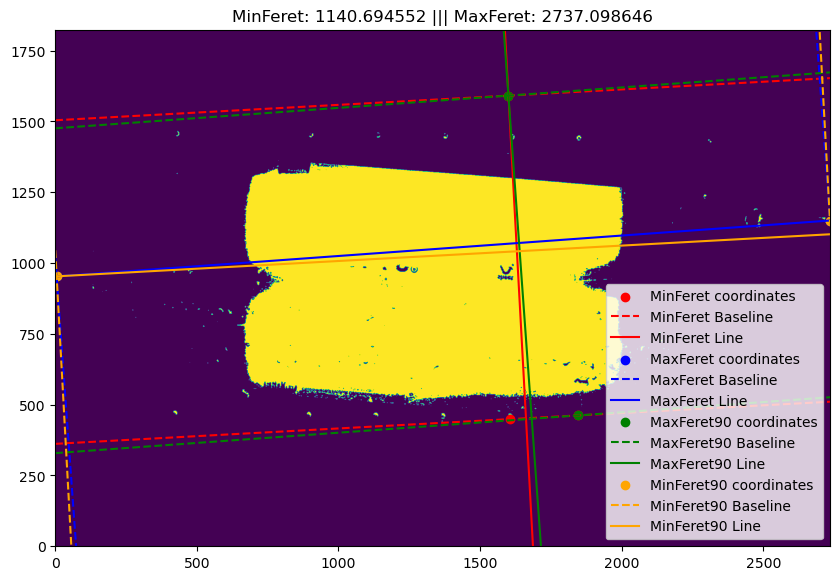

Processing images:   2%|█▎                                                           | 24/1092 [00:56<42:16,  2.37s/it]

Filename: 1018.jpeg, Max Feret Length: 2737.0986463772183, Min Feret Length: 1140.6945519117028


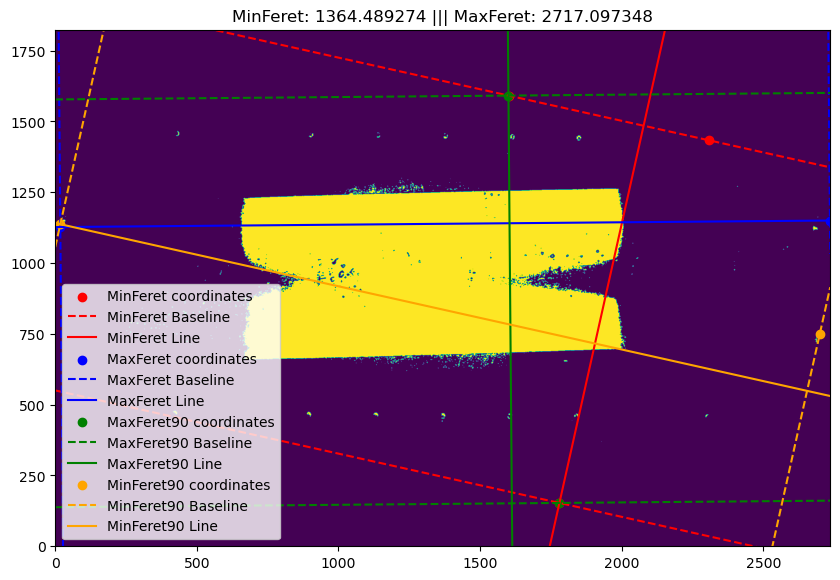

Processing images:   2%|█▍                                                           | 25/1092 [00:59<41:49,  2.35s/it]

Filename: 1019.jpeg, Max Feret Length: 2717.097348274441, Min Feret Length: 1364.4892735403473


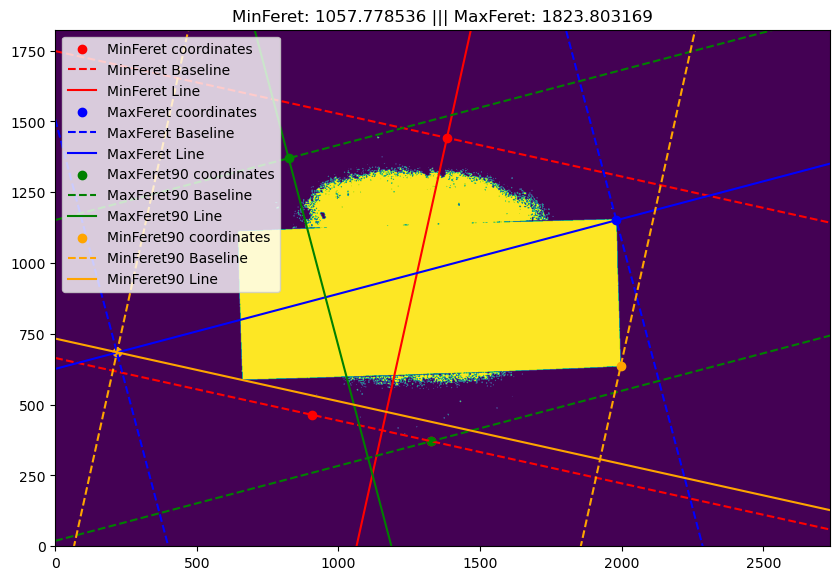

Processing images:   2%|█▍                                                           | 26/1092 [01:01<41:08,  2.32s/it]

Filename: 102.jpeg, Max Feret Length: 1823.8031692043965, Min Feret Length: 1057.7785363365265


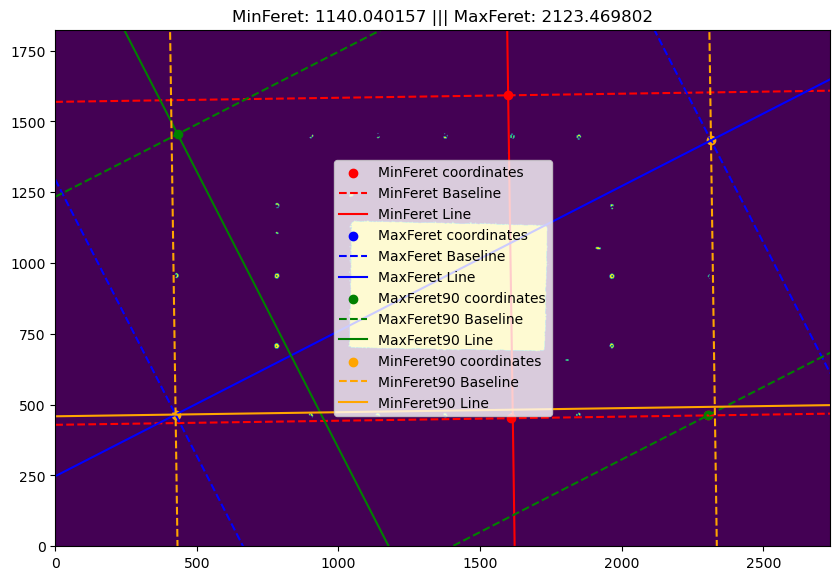

Processing images:   2%|█▌                                                           | 27/1092 [01:03<39:43,  2.24s/it]

Filename: 1020.jpeg, Max Feret Length: 2123.4698019986063, Min Feret Length: 1140.0401567794436


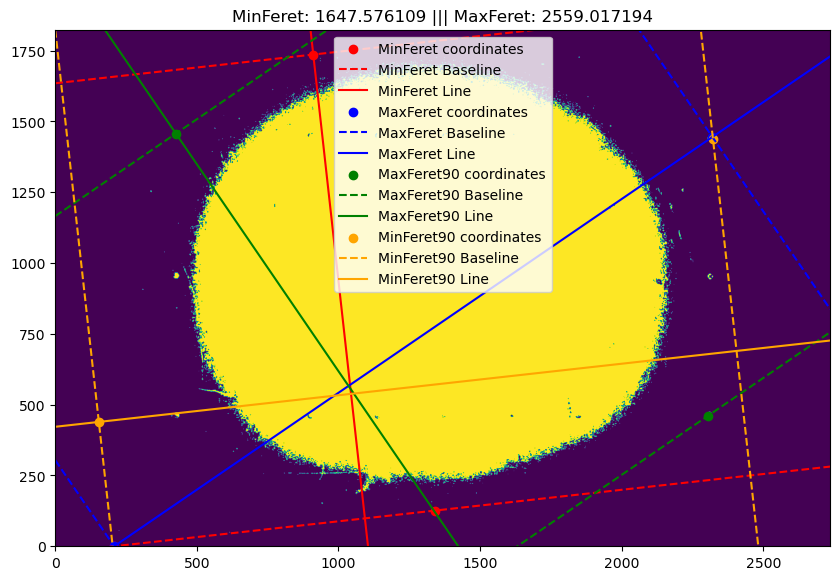

Processing images:   3%|█▌                                                           | 28/1092 [01:05<41:15,  2.33s/it]

Filename: 1021.jpeg, Max Feret Length: 2559.0171941587264, Min Feret Length: 1647.5761092429364


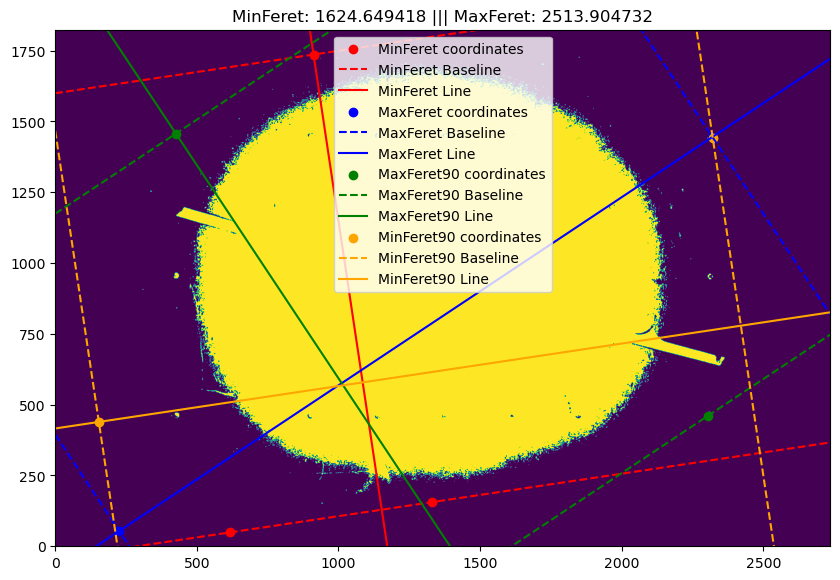

Processing images:   3%|█▌                                                           | 29/1092 [01:08<42:25,  2.39s/it]

Filename: 1022.jpeg, Max Feret Length: 2513.9047316873407, Min Feret Length: 1624.6494180834711


Processing images:   3%|█▌                                                           | 29/1092 [01:10<42:50,  2.42s/it]


KeyboardInterrupt: 

In [38]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import cv2  # Import OpenCV for image preprocessing
import feret  # Import the feret module

# Directory containing the images
directory = 'Camera2/front'

# Get the list of image files in the directory
image_files = [f for f in os.listdir(directory) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Iterate through each file in the directory with tqdm for progress tracking
for filename in tqdm(image_files, desc="Processing images"):
    # Construct the full path to the image
    filepath = os.path.join(directory, filename)
    
    # Load the image and convert to a numpy array
    img = Image.open(filepath)
    img_array = np.array(img.convert('L'))  # Convert to grayscale
    
    # Preprocess the image
    # Step 1: Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(img_array, (5, 5), 0)
    
    # Step 2: Apply Otsu's thresholding
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Check if the colors are correct; invert if necessary
    white_pixels = np.sum(binary == 255)
    black_pixels = np.sum(binary == 0)
    
    if white_pixels > black_pixels:
        binary = cv2.bitwise_not(binary)

    # Calculate Feret diameters on the preprocessed image
    try:
        # Plot Feret diameters on the preprocessed image
        feret.plot(binary)        
        # Calculate Feret diameters and angles
        maxf_length, minf_length, minf_angle, maxf_angle = feret.all(binary)
        
        # Print the results for the current image
        print(f"Filename: {filename}, Max Feret Length: {maxf_length}, Min Feret Length: {minf_length}")
        
    except Exception as e:
        print(f"Error processing {filename}: {e}")

# Optionally, print all results at the end
# for res in results:
#     print(f"Filename: {res['filename']}, Max Feret Length: {res['maxf_length']}, Min Feret Length: {res['minf_length']}")
